# Electrical Stability

## Imports

In [519]:
import argparse
import logging
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Carga de Datos

In [520]:
def load_data(file_path):
    """Load data from a CSV file into a pandas DataFrame."""
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        logging.error(f"Error loading data: {e}")
        return pd.DataFrame()

In [521]:
df = load_data('../data/Tema_16.csv') # Load the dataset

## Análisis exploratorio

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    9518 non-null   object 
 1   tau2    9508 non-null   float64
 2   tau3    9510 non-null   float64
 3   tau4    9510 non-null   float64
 4   p1      9516 non-null   float64
 5   p2      9509 non-null   float64
 6   p3      9509 non-null   float64
 7   p4      9509 non-null   float64
 8   g1      9511 non-null   float64
 9   g2      9509 non-null   float64
 10  g3      9510 non-null   float64
 11  g4      9508 non-null   float64
 12  stab    9510 non-null   float64
 13  stabf   9510 non-null   object 
dtypes: float64(12), object(2)
memory usage: 1.1+ MB


In [523]:
# Transform tau1 into float and stabf into string
df['tau1'] = pd.to_numeric(df['tau1'], errors='coerce')
df['stabf'] = df['stabf'].astype(str)

In [524]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,9418.000000,9508.000000,9510.000000,9510.000000,9516.000000,9509.000000,9509.000000,9509.000000,9511.000000,9509.000000,9510.000000,9508.000000,9510.000000
mean,6.262916,5.244768,5.248410,5.247679,4.331609,-1.249897,-1.250695,-1.249889,0.625221,0.525705,0.525133,0.523920,0.015830
std,10.086302,2.738029,2.741857,2.741789,5.675074,0.433278,0.432702,0.432560,1.008878,0.274289,0.274135,0.274258,0.036903
min,0.500793,0.501582,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.907193,2.879708,2.870172,2.871294,3.221693,-1.625225,-1.626675,-1.624413,0.288739,0.288725,0.287669,0.286650,-0.015425
50%,5.328759,5.236041,5.235974,5.250743,3.762752,-1.250501,-1.249917,-1.250992,0.530080,0.525747,0.524528,0.523747,0.017207
75%,7.695478,7.611048,7.622416,7.623121,4.300006,-0.873343,-0.875962,-0.874745,0.769924,0.763756,0.762486,0.760747,0.044958
max,99.994695,9.999837,9.999450,9.999443,58.644180,-0.500108,-0.500072,-0.500025,9.999371,0.999944,0.999839,0.999930,0.109403


In [525]:
df.isnull().sum()

tau1     592
tau2     502
tau3     500
tau4     500
p1       494
p2       501
p3       501
p4       501
g1       499
g2       501
g3       500
g4       502
stab     500
stabf      0
dtype: int64

In [526]:
# Impossible ranages based on the provided data description

tau1_invalid = df[(df['tau1'] <= 0.5) | (df['tau1'] >= 10)]

tol = 1e-6

p1_invalid = df[abs(df['p1'] - abs(df['p2'] + df['p3'] + df['p4'])) > tol]
p2_invalid = df[(df['p2'] <= -2) | (df['p2'] >= -0.5)]
p3_invalid = df[(df['p3'] <= -2) | (df['p3'] >= -0.5)]
p4_invalid = df[(df['p4'] <= -2) | (df['p4'] >= -0.5)]

g1_invalid = df[(df['g1'] <= 0.05) | (df['g1'] >= 1)]
g2_invalid = df[(df['g2'] <= 0.05) | (df['g2'] >= 1)]
g3_invalid = df[(df['g3'] <= 0.05) | (df['g3'] >= 1)]
g4_invalid = df[(df['g4'] <= 0.05) | (df['g4'] >= 1)]

# if stab is positive, stabf should be 'unstable'
stabf_invalid = df[(df['stab'] > 0) & (df['stabf'] != 'unstable')]
# if stab is negative, stabf should be 'stable'
stabf_invalid = pd.concat([stabf_invalid, df[(df['stab'] < 0) & (df['stabf'] != 'stable')]])
# filter out entries where stabf is nan, None or empty string
stabf_invalid = stabf_invalid[~stabf_invalid['stabf'].isin(['nan', 'None', ''])]

print(f"Invalid tau1 entries: {len(tau1_invalid)}")
print(f"Invalid p1 entries: {len(p1_invalid)}")
print(f"Invalid p2 entries: {len(p2_invalid)}")
print(f"Invalid p3 entries: {len(p3_invalid)}")
print(f"Invalid p4 entries: {len(p4_invalid)}")
print(f"Invalid g1 entries: {len(g1_invalid)}")
print(f"Invalid g2 entries: {len(g2_invalid)}")
print(f"Invalid g3 entries: {len(g3_invalid)}")
print(f"Invalid g4 entries: {len(g4_invalid)}")
print(f"Invalid stabf entries: {len(stabf_invalid)}")

Invalid tau1 entries: 100
Invalid p1 entries: 89
Invalid p2 entries: 0
Invalid p3 entries: 0
Invalid p4 entries: 0
Invalid g1 entries: 101
Invalid g2 entries: 0
Invalid g3 entries: 0
Invalid g4 entries: 0
Invalid stabf entries: 0


Descartamos el caso donde stabf es nulo ya que esos casos son contemplados cuando se traten los valores nulos, no inválidos.

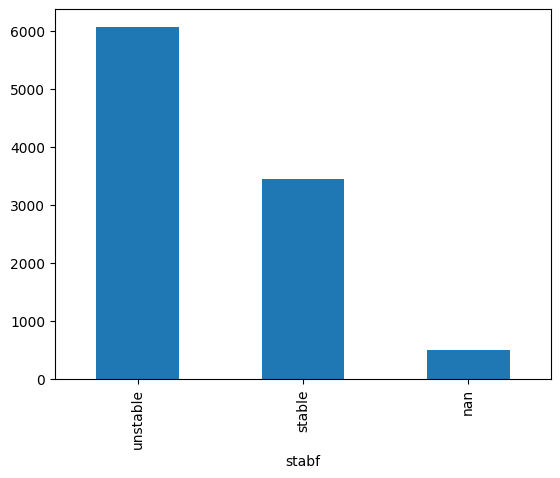

In [527]:
_ = df['stabf'].value_counts().plot(kind='bar')

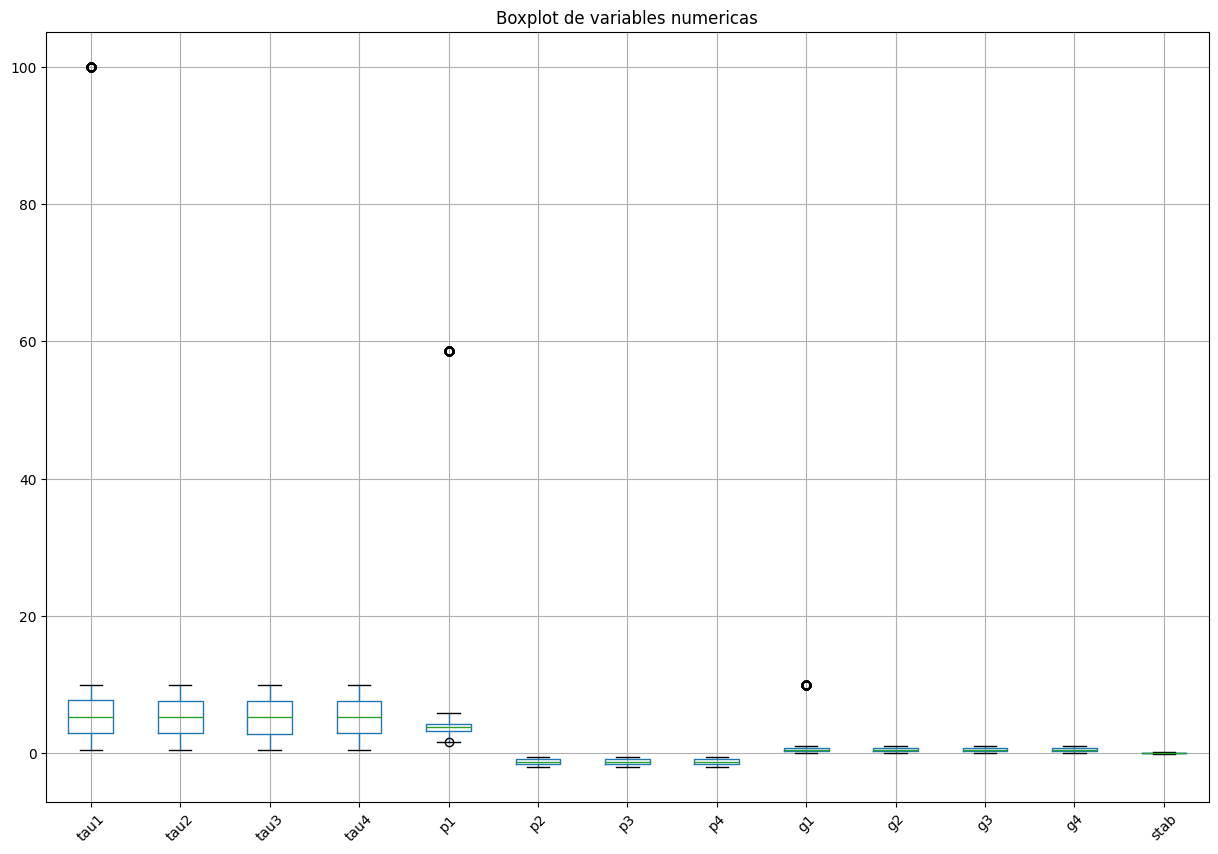

In [528]:
# Hacer un boxplot de las variables numericas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot(rot=45)
plt.title('Boxplot de variables numericas')
plt.show()

## Pretratamiento de datos

In [529]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

cols = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab']

# Imputar la media sin considerar outliers
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col].mean()
    df[col].fillna(mean_value, inplace=True)

# Calcular stabf en caso de no existir o ser texto 'nan'
# hacer que donde diga 'nan' en stabf, se reemplace por NaN
df['stabf'] = df['stabf'].replace('nan', np.nan)
df['stabf'] = df['stabf'].fillna(df['stab'].apply(lambda x: 'unstable' if x > 0 else 'stable'))

# Eliminar outliers
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

/tmp/ipykernel_32472/4280542050.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
/tmp/ipykernel_32472/4280542050.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [530]:
# Eliminar filas con valores invalidos (se eliminan todas las filas que tengan algun valor invalido)

df = df[~df.index.isin(tau1_invalid.index)]

df = df[~df.index.isin(p1_invalid.index)]
df = df[~df.index.isin(p2_invalid.index)]
df = df[~df.index.isin(p3_invalid.index)]
df = df[~df.index.isin(p4_invalid.index)]

df = df[~df.index.isin(g1_invalid.index)]
df = df[~df.index.isin(g2_invalid.index)]
df = df[~df.index.isin(g3_invalid.index)]
df = df[~df.index.isin(g4_invalid.index)]

df = df[~df.index.isin(stabf_invalid.index)]


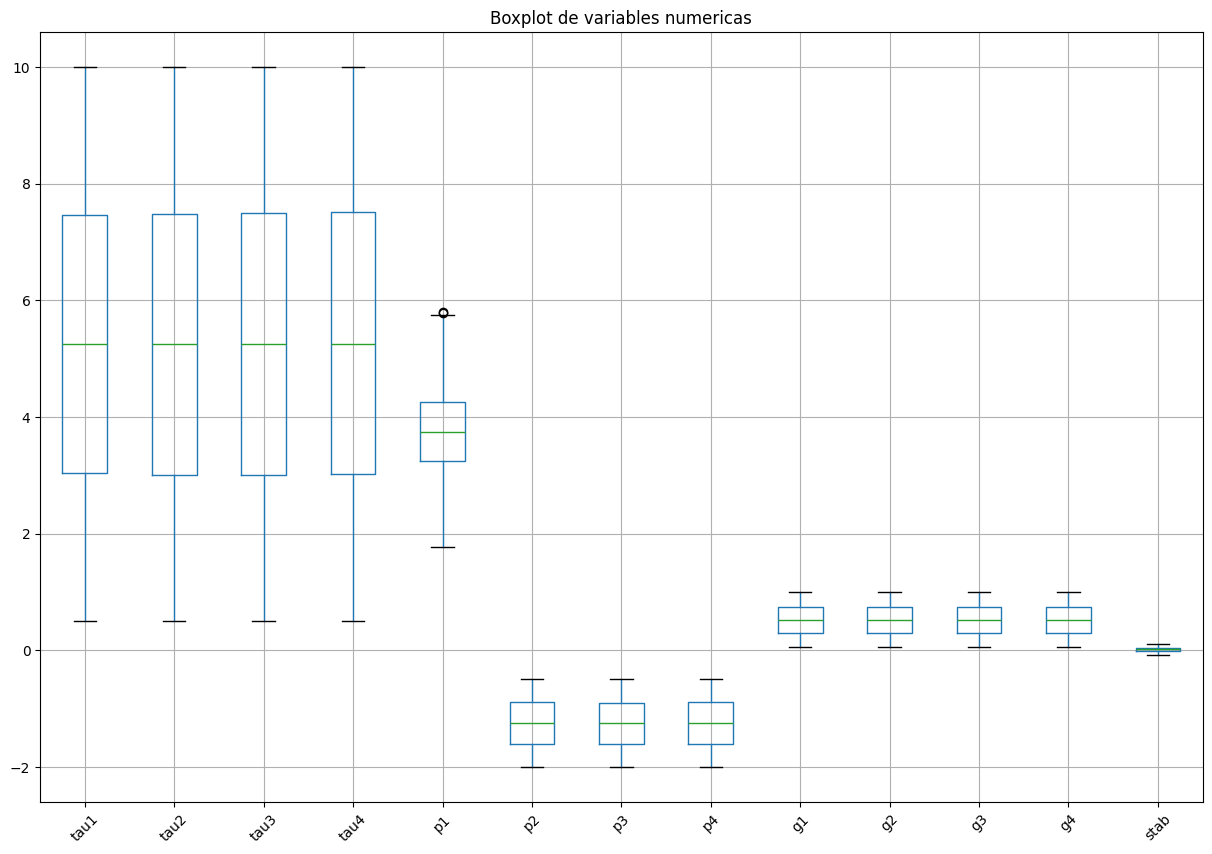

In [531]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot(rot=45)
plt.title('Boxplot de variables numericas')
plt.show()

In [532]:
# find unique values in stabf
unique_stabf = df['stabf'].unique()
print(f"Unique values in stabf: {unique_stabf}")

nan_stabf_count = df['stabf'].isna().sum()
print(f"Cantidad de filas donde stabf es nan: {nan_stabf_count}")

# Codificacion de variables categoricas (stabf)
df['stabf'] = df['stabf'].map({'stable': 0, 'unstable': 1})

# Cantidad de filas finales
print(f"Cantidad de filas finales: {len(df)}")

Unique values in stabf: ['unstable' 'stable']
Cantidad de filas donde stabf es nan: 0
Cantidad de filas finales: 9694


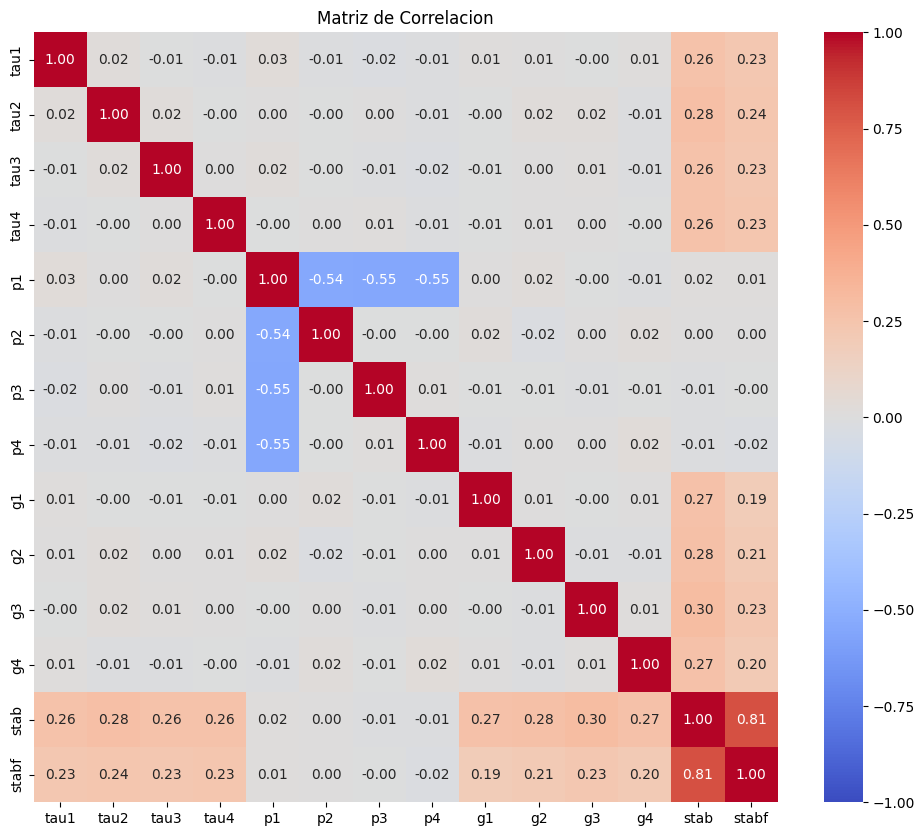

In [533]:
# Matriz de correlacion
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
# Color siempre entre -1 y 1
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlacion')
plt.show()

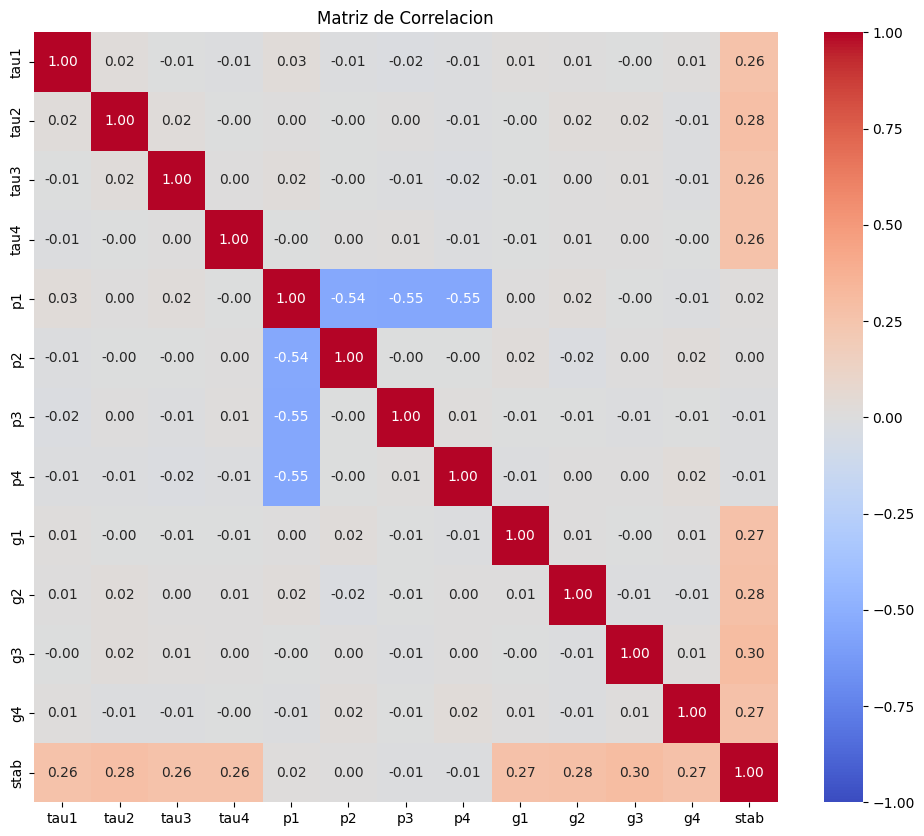

In [534]:
# Eliminar columna stabf
df.drop('stabf', axis=1, inplace=True)


plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
# Color siempre entre -1 y 1
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlacion')
plt.show()

## Estudio mediante PCA

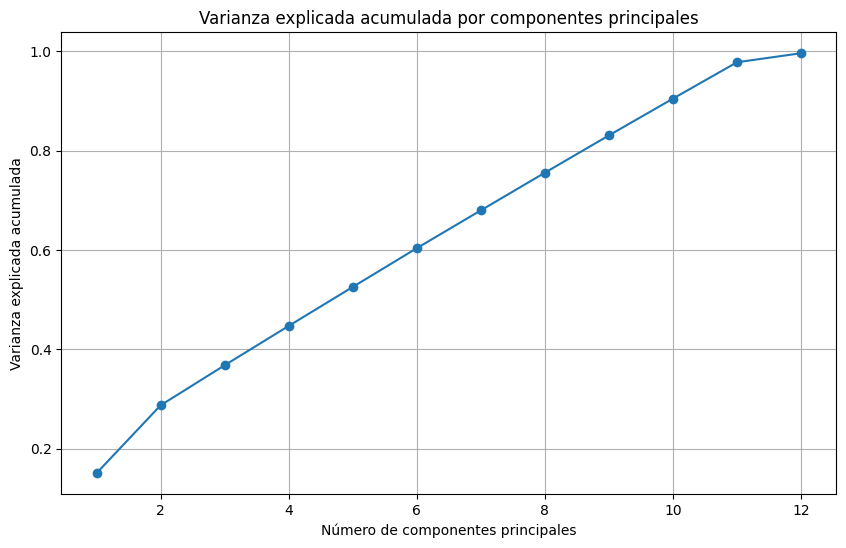

In [535]:
# Normalizacion de datos

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

n = 12
pca = PCA(n_components=n)
pca.fit(df_scaled)
pca.explained_variance_ratio_

# Graficar la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza explicada acumulada por componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid()

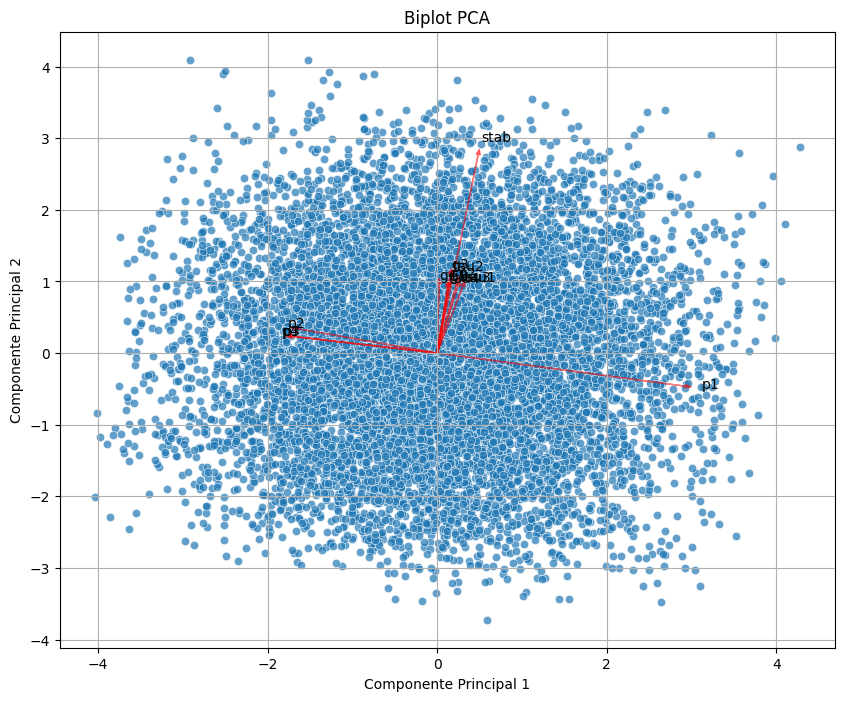

In [538]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, alpha=0.7)
plt.title('Biplot PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

for i, col in enumerate(df.columns):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, color='r', alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, col)

plt.grid(True)
plt.show()


## Modelo predictivo